In [1]:
# Step 1: Libraries Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: Interactive plots
#import plotly.express as px


In [2]:
# Step 2: Load Data from Folders
enrolment_folder = "api_data_aadhar_enrolment"
demographic_folder = "api_data_aadhar_demographic"
biometric_folder = "api_data_aadhar_biometric"

# Load all CSV/Excel files from each folder
def load_all_data(folder_path):
    all_files = os.listdir(folder_path)
    df_list = []
    for file in all_files:
        if file.endswith(".csv"):  # or .xlsx if Excel
            df_list.append(pd.read_csv(os.path.join(folder_path, file)))
    return pd.concat(df_list, ignore_index=True)

df_enrolment = load_all_data(enrolment_folder)
df_demographic = load_all_data(demographic_folder)
df_biometric = load_all_data(biometric_folder)


In [4]:
# Step 3: Initial Exploration
print(df_enrolment.head())
print(df_enrolment.info())
print(df_enrolment.isnull().sum())

print(df_demographic.head())
print(df_demographic.info())
print(df_demographic.isnull().sum())
print("jsdjsahd")
print(df_biometric.head())
print(df_biometric.info())
print(df_biometric.isnull().sum())


         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         10

In [29]:
df_enrolment.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,months,total_population
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,March,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,March,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,March,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,March,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,March,51


In [30]:
df_enrolment.isnull().sum()

date                0
state               0
district            0
pincode             0
age_0_5             0
age_5_17            0
age_18_greater      0
months              0
total_population    0
dtype: int64

In [6]:
# Merged dataset ke rows count
total_rows = df_enrolment.shape[0]
print("Total rows in merged data:", total_rows)


Total rows in merged data: 1006029


In [10]:
import pandas as pd

# Convert 'date' column to datetime, telling Pandas that day comes first
df_enrolment['date'] = pd.to_datetime(df_enrolment['date'], dayfirst=True)

# Now you can extract month names
df_enrolment['months'] = df_enrolment['date'].dt.month_name()

df_enrolment.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,months
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,March
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,March
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,March
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,March
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,March


In [12]:
df_enrolment['total_population'] = df_enrolment['age_0_5'] + df_enrolment['age_5_17'] + df_enrolment['age_18_greater']
df_enrolment.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,months,total_population
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,March,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,March,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,March,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,March,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,March,51


In [13]:
monthly_summary = df_enrolment.groupby('months')['total_population'].sum().reset_index()
monthly_summary

,months,total_population
0,April,257438
1,December,759658
2,July,616868
3,June,215734
4,March,16582
5,May,183616
6,November,1092007
7,October,817920
8,September,1475879


In [15]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_summary['months'] = pd.Categorical(monthly_summary['months'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values('months')
monthly_summary


,months,total_population
4,March,16582
0,April,257438
5,May,183616
3,June,215734
2,July,616868
8,September,1475879
7,October,817920
6,November,1092007
1,December,759658


In [22]:
state_summary = df_enrolment.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum().reset_index()
state_summary['total_population'] = state_summary['age_0_5'] + state_summary['age_5_17'] + state_summary['age_18_greater']
df_enrolment.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,months,total_population
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,March,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,March,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,March,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,March,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,March,51


In [18]:
district_summary = df_enrolment.groupby(['state','district'])[['age_0_5','age_5_17','age_18_greater']].sum().reset_index()
district_summary

,state,district,age_0_5,age_5_17,age_18_greater
0,100000,100000,0,1,217
1,Andaman & Nicobar Islands,Andamans,70,5,0
2,Andaman & Nicobar Islands,Nicobars,1,0,0
3,Andaman & Nicobar Islands,South Andaman,38,0,0
4,Andaman and Nicobar Islands,Nicobar,64,11,0
...,...,...,...,...,...
1065,West Bengal,nadia,2,1,0
1066,West bengal,hooghly,6,1,0
1067,Westbengal,Hooghly,3,3,0
1068,andhra pradesh,chittoor,4,0,0


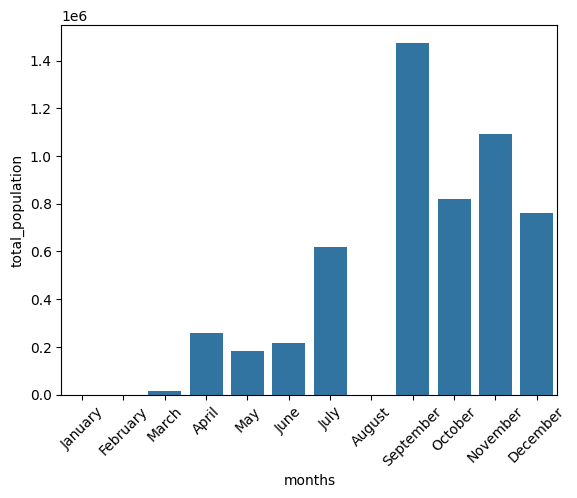

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=monthly_summary, x='months', y='total_population')
plt.xticks(rotation=45)
plt.show()



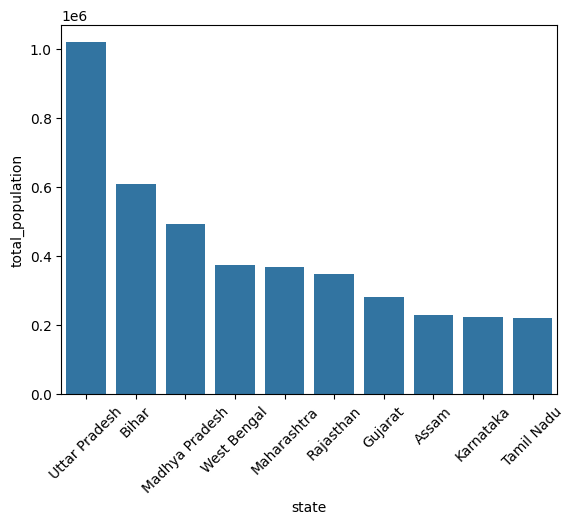

In [24]:
top_states = state_summary.sort_values('total_population', ascending=False).head(10)
sns.barplot(data=top_states, x='state', y='total_population')
plt.xticks(rotation=45)
plt.show()

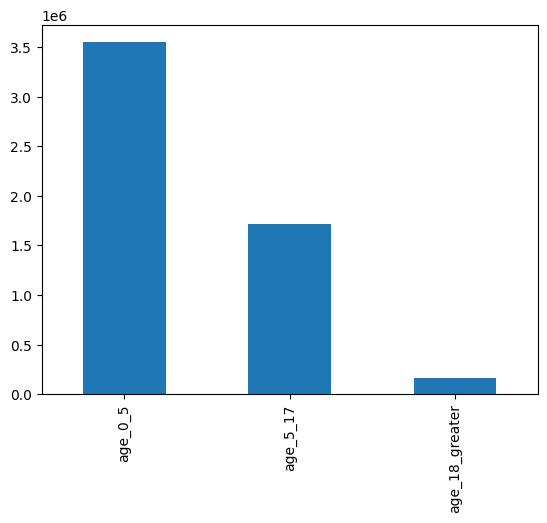

In [25]:
age_cols = ['age_0_5','age_5_17','age_18_greater']
df_enrolment[age_cols].sum().plot(kind='bar')
plt.show()


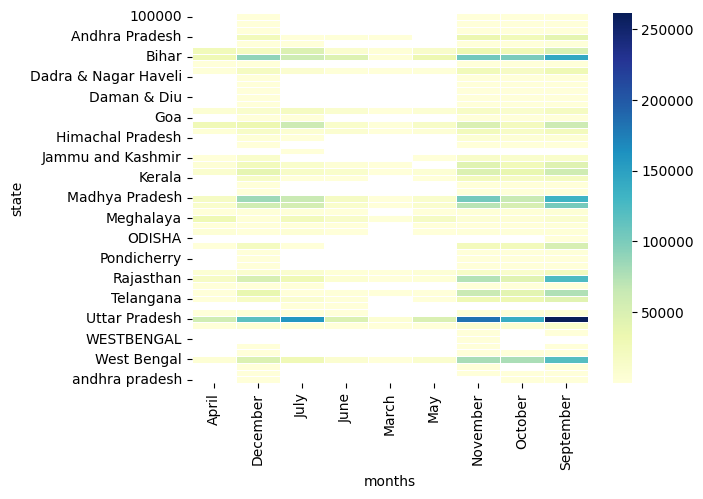

In [26]:
heatmap_data = df_enrolment.groupby(['state','months'])['total_population'].sum().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.show()


C:\Users\Dell 5490T\AppData\Local\Temp\ipykernel_17556\4096330659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_summary, x='months', y='total_population', palette='Blues_d')


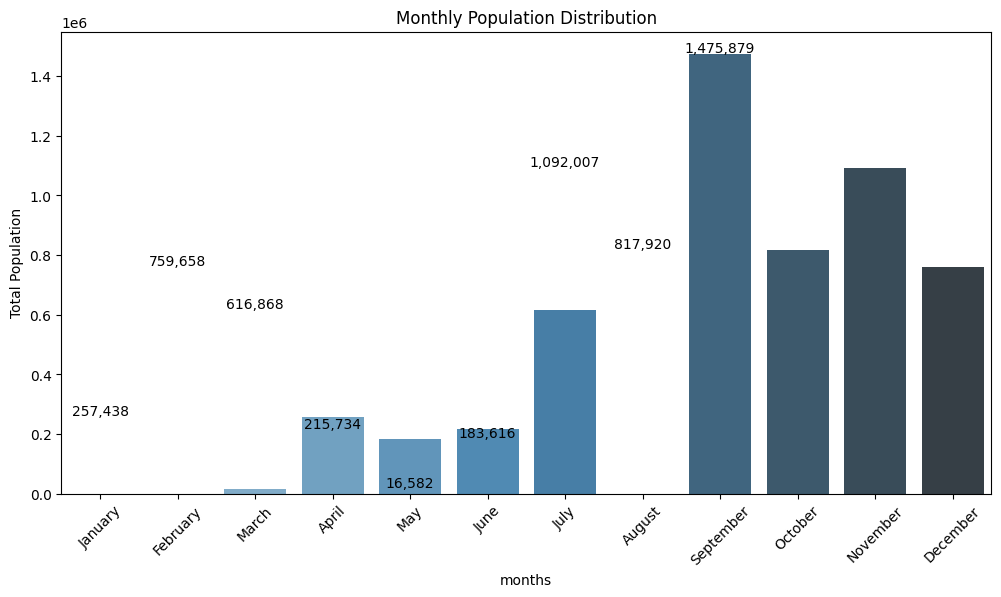

In [31]:


# Assume you already have monthly_summary
# Example: monthly_summary columns = ['months', 'total_population']


# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_summary, x='months', y='total_population', palette='Blues_d')

# Add numbers on top of bars
for index, row in monthly_summary.iterrows():
    plt.text(x=index, y=row['total_population'] + 5000, s=f"{row['total_population']:,}", ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.ylabel('Total Population')
plt.title('Monthly Population Distribution')
plt.show()
